In [31]:
import numpy as np
dat = np.load("/Users/sherryyang/wigginsLab/data/0709/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00036xy0c1_seg.npy", allow_pickle=True).item()

In [32]:
dat['masks']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [33]:
np.max(dat['masks'])

272

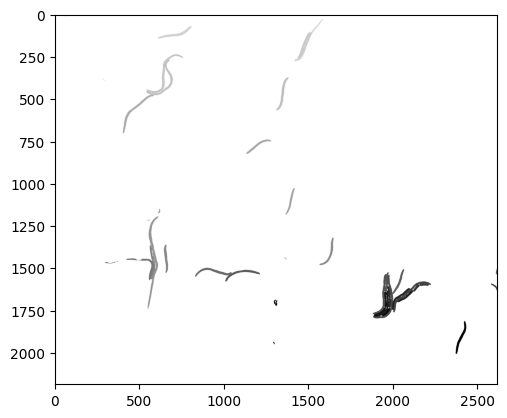

In [11]:
import matplotlib.pyplot as plt
plt.imshow(dat['masks'],cmap='Greys')

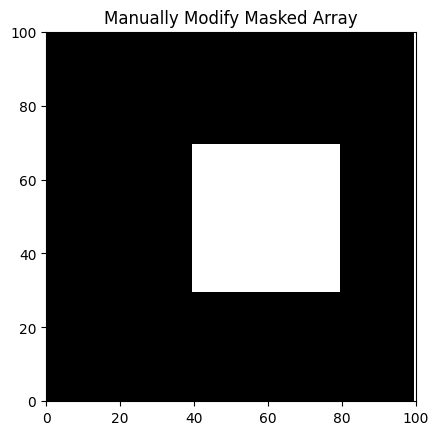

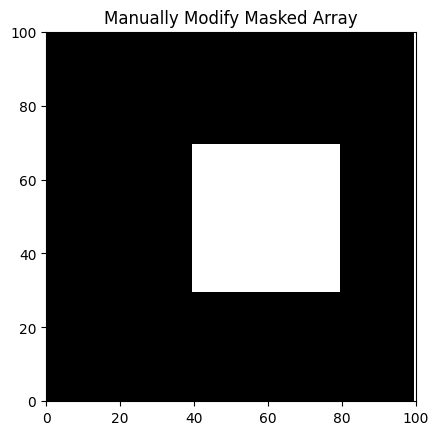

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path

# Create a sample masked 2D array (0: background, 1: masked region)
masked_array = np.zeros((100, 100))
masked_array[30:70, 40:80] = 1

# Display the masked array
plt.imshow(masked_array, cmap='gray')
plt.title("Manually Modify Masked Array")

# Interactive drawing of the mask
plt.gca().set_xlim(0, 100)
plt.gca().set_ylim(0, 100)
polygon = None
vertices = []

def on_click(event):
    global polygon, vertices
    if event.button == 1 and polygon is None:
        vertices.append((event.xdata, event.ydata))
        if len(vertices) > 1:
            if polygon is not None:
                polygon.remove()
            polygon = plt.gca().add_patch(Polygon(vertices, closed=False, fill=False, color='red'))
            plt.draw()
    elif event.button == 3 and polygon is not None:
        vertices.append(vertices[0])  # Close the polygon
        path = Path(vertices)
        for i in range(masked_array.shape[0]):
            for j in range(masked_array.shape[1]):
                if path.contains_point((j, i)):
                    masked_array[i, j] = 1
        polygon.remove()
        polygon = None
        vertices = []
        plt.imshow(masked_array, cmap='gray')
        plt.draw()

plt.gcf().canvas.mpl_connect('button_press_event', on_click)
plt.show()

In [5]:
# importing the necessary modules
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time
import sys
import random
import matplotlib
matplotlib.use('nbagg')


class MouseEvent:

	# initialization
	def __init__(self):
		(figure, axes) = plt.subplots()
		axes.set_aspect(1)
		figure.canvas.mpl_connect('button_press_event', self.press)
		figure.canvas.mpl_connect('button_release_event', self.release)

	# start event to show the plot
	def start(self):
		plt.show() # display the plot

	# press event will keep the starting time when u
	# press mouse button
	def press(self, event):
		self.start_time = time.time()

	# release event will keep the track when you release
	# mouse button
	def release(self, event):
		self.end_time = time.time()
		self.draw_click(event)

	# drawing the plot
	def draw_click(self, event):
		# size = square (4 * duration of the time button
		# is keep pressed )
		size = 4 * (self.end_time - self.start_time) ** 2

		# create a point of size=0.002 where mouse button
		# clicked on the plot
		c1 = plt.Circle([event.xdata, event.ydata], 0.002,)

		# create a circle of radius 0.02*size
		c2 = plt.Circle([event.xdata, event.ydata], 0.02 * size, alpha=0.2)
		event.canvas.figure.gca().add_artist(c1)
		event.canvas.figure.gca().add_artist(c2)
		event.canvas.figure.show()


cbs = MouseEvent()

# start the event
cbs.start()

<IPython.core.display.Javascript object>

In [ ]:
t00021
t00031 middle